# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.nophasing import Constraint6Model

## Constants

In [2]:
FLOW_UNDERSAT       = 450 # veh / hr / lane
FLOW_SAT            = 600 
FLOW_OVERSAT        = 900

Timesteps : Running Time
10        : 0.32
20        : 7.18

## Using the Module

In [14]:
model = Constraint6Model(
    time_step=3,
    time_range=40,
    g_min=10,
    g_max=50
)

model.generate()

In [15]:
model._constraints.keys()

['turnratios',
 'greentime',
 'init',
 'flowcon',
 'flowrate',
 'conflicts',
 'greenflowrate']

In [16]:
model.solve(log_output=True)

Solving...
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 6560.000000 after 0.00 sec. (0.79 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 3212 rows and 492 columns.
MIP Presolve modified 1144 coefficients.
Aggregator did 452 substitutions.
Reduced MIP has 4004 rows, 2256 columns, and 18068 nonzeros.
Reduced MIP has 480 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (20.71 ticks)
Probing time = 0.00 sec. (0.77 ticks)
Tried aggregator 1 time.
MIP Presolve modified 8 coefficients.
Reduced MIP has 4004 rows, 2256 columns, and 18068 nonzeros.
Reduced MIP has 480 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (12.16 ticks)
Probing time = 0.00 sec. (0.77 ticks)
Clique table members: 320.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.08 sec. (55.02 ticks)

        Nodes        

10.458721160888672

## Showing the Cell Capacities

In [17]:
df_x, df_y, df_g = model.return_solution()

In [18]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,2.0,0.00000,0.000,0.0,0.0,0.0000
1,2.5,0.00000,0.000,1.5,0.0,0.0000
2,3.0,0.00000,0.000,1.5,1.5,0.0000
3,3.5,0.00000,0.000,1.5,1.5,1.5000
4,4.0,0.00000,0.750,1.5,1.5,2.0625
5,4.5,0.75000,0.750,1.5,1.5,2.6250
6,5.0,0.75000,0.750,1.5,1.5,3.1875
7,5.5,0.75000,0.750,1.5,1.5,3.7500
8,6.0,0.75000,0.750,1.5,1.5,4.3125


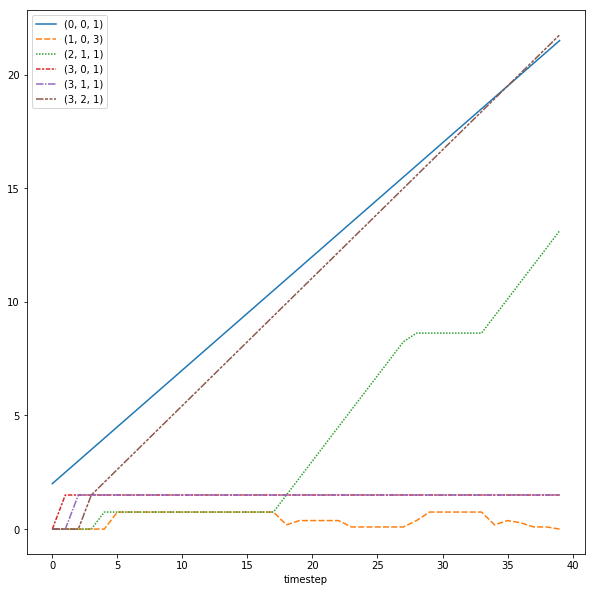

In [20]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach)

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [21]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,1.5,0.000,0.0,0.0,0.0000
1,1.5,0.000,1.5,0.0,0.0000
2,1.5,0.000,1.5,1.5,0.0000
3,1.5,0.000,1.5,1.5,0.9375
4,1.5,0.750,1.5,1.5,0.9375
5,1.5,0.750,1.5,1.5,0.9375
6,1.5,0.750,1.5,1.5,0.9375
7,1.5,0.750,1.5,1.5,0.9375
8,1.5,0.750,1.5,1.5,0.9375


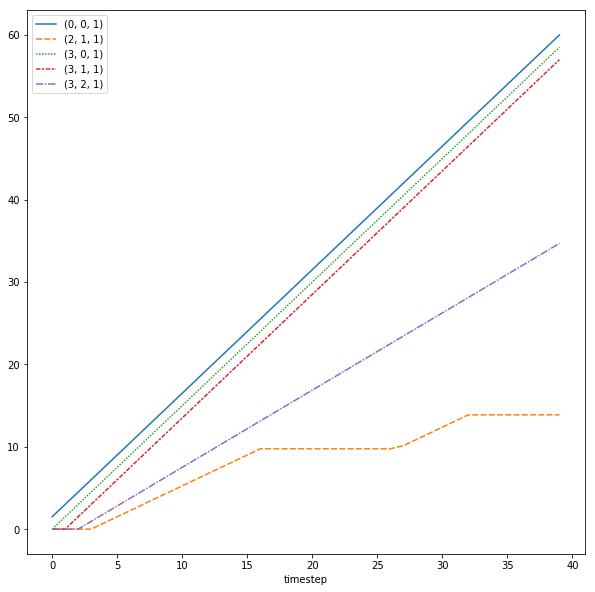

In [22]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach.cumsum())

### Comparing the Green Signal and the Flow

In [23]:
df_g_specific = df_g[df_g.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

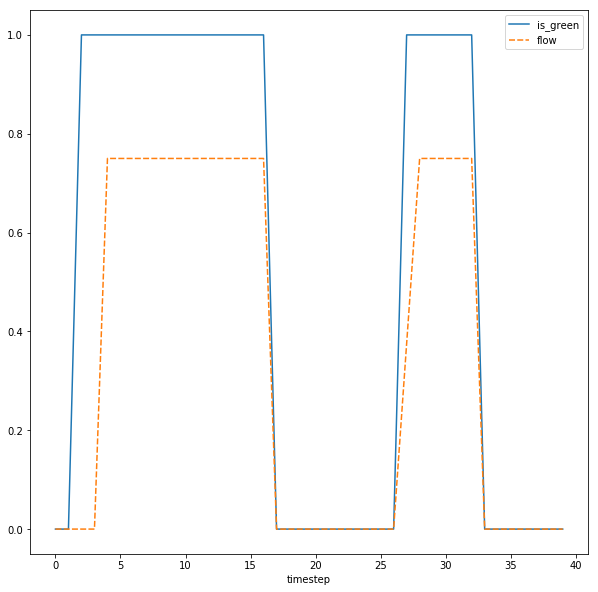

In [24]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)